### 
<center>
    




 # 1 降维 （第三讲——大数据预处理）


2024年3月10日

**   Notes： 这是204春季《大数据与金融》课程的代码（python版）**

Python 与 R 在做降维分析时都挺好用。

但是 R 的包提供了更多集成化的输出。

Python很多的包太懒了，需要手动输出和绘制一些结果。

</center>

## 1.1 主成分分析

### 1.1.1 示例数据

In [14]:
# 导入数据

import pandas as pd
import numpy as np

X = pd.read_csv('/Users/yumanlou/Library/CloudStorage/OneDrive-email.cufe.edu.cn/2025/第五学期/论文/ESG/carbon_emission_finance/data/data1.2_pca.csv')  # 这里注意更改路径
X.head()

,co2_emissions,gdp,green_invention_patents,green_utility_patents,credit,bond,investment,insurance,equity,fund,carbon_finance
0,7.153818e+07,4880.0,98.0,109.0,0.024,0.067,0.120,0.007,0.034,0.030,6.212
1,6.964592e+07,5348.1,165.0,202.0,0.024,0.069,0.095,0.011,0.037,0.030,6.250
2,8.086629e+07,5908.1,272.0,230.0,0.025,0.076,0.101,0.010,0.038,0.035,5.533
3,9.231935e+07,6952.5,382.0,254.0,0.024,0.079,0.116,0.009,0.040,0.037,4.827
4,1.082541e+08,8309.4,451.0,354.0,0.025,0.084,0.081,0.013,0.040,0.039,4.367


In [15]:
# 进行标准化

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # 创建数据标准化模型
scaler.fit(X)  # 计算用于以后缩放的 mean 和 std
X2 = pd.DataFrame(scaler.transform(X))  # transfrom 方法通过找中心和缩放等实现标准化

print(X2.shape[1])  # 查看特征数量
X2.head()  # 查看标准化后的数据列
X2.to_csv('X2standardize.csv', index=False, encoding='utf-8')

11


In [16]:
# 假设 X2 已经被加载并是一个 pandas DataFrame

# 1. 检查每一列的 NaN 数量
print("--- 每列的 NaN 数量 ---")
nan_counts = X2.isnull().sum()
print(nan_counts)

# 2. 检查整个 DataFrame 是否存在任何 NaN
print("\n--- 整个 DataFrame 是否存在 NaN ---")
has_any_nan = X2.isnull().values.any()
print(f"是否存在任何 NaN 值: {has_any_nan}")

# 3. 检查 NaN 总数（如果 nan_counts 不够清晰）
total_nan = X2.isnull().sum().sum()
print(f"DataFrame 中 NaN 的总数量: {total_nan}")

--- 每列的 NaN 数量 ---
0     0
1     0
2     6
3     6
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

--- 整个 DataFrame 是否存在 NaN ---
是否存在任何 NaN 值: True
DataFrame 中 NaN 的总数量: 12


In [19]:
#用中位数填充NaN
# 假设 X2 已经加载
# ----------------------------------------------------

# 1. 计算 X2 中每一列的中位数
# 注意：即使数据已标准化，我们仍用 .median() 确保稳健性
# 标准化数据的中位数通常接近于 0
median_values = X2.median()

# 2. 使用中位数填充所有 NaN 值
X2_filled = X2.fillna(median_values)

# 3. 检查填充后的缺失值数量，确认操作成功
print("--- 填充后的 NaN 数量 ---")
print(X2_filled.isnull().sum())

# 4. 验证整个 DataFrame 是否还有 NaN
has_nan_after_fill = X2_filled.isnull().values.any()
print(f"\n填充后是否存在任何 NaN 值: {has_nan_after_fill}")

# X2_filled 现在是您用于 PCA 和回归的干净数据

--- 填充后的 NaN 数量 ---
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

填充后是否存在任何 NaN 值: False


### **在这里第3列之后都是需要的数据**

In [21]:
# PCA

# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt  # 加载 matplotlib 用于数据的可视化
from sklearn.decomposition import PCA  # 加载 PCA 算法包

pca = PCA(n_components=X2.shape[1]-1)  # 创建主成分分析对象，设定主成分数为样本特征数 - 1

reduced_x = pca.fit_transform(X2_filled)  # 基于已标准化数据创建主成分分析模型，对样本进行降维

covper = pca.explained_variance_  # 降维后的各主成分的方差值
covper = np.round(covper, 2) 
covper

array([6.42, 1.83, 1.49, 0.58, 0.25, 0.18, 0.09, 0.06, 0.05, 0.03])

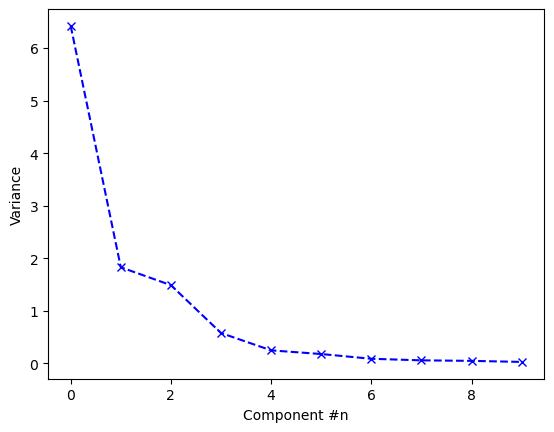

In [22]:
plt.plot(covper, 'bx--')
plt.xlabel('Component #n')
plt.ylabel('Variance')
plt.show()

In [23]:
 # 调整精确度
# print(covper)

# 绘制碎石图



contribution = pca.explained_variance_ratio_  # 降维后的各主成分的方差值占总方差值的比例（贡献率）
contribution = np.round(contribution, 2)
contribution

array([0.58, 0.17, 0.14, 0.05, 0.02, 0.02, 0.01, 0.01, 0.  , 0.  ])

In [24]:
pd.DataFrame(contribution)  # 输出贡献率

,0
0,0.58
1,0.17
2,0.14
3,0.05
4,0.02
5,0.02
6,0.01
7,0.01
8,0.00
9,0.00


In [25]:
pd.DataFrame(np.round(reduced_x, 3))   # 输出主成分

,0,1,2,3,4,5,6,7,8,9
0,-3.368,-1.532,-0.478,-0.694,-0.107,0.059,-0.093,-0.002,0.248,-0.027
1,-3.193,-1.469,-0.476,-0.706,-0.007,0.097,-0.123,-0.009,0.184,0.150
2,-2.824,-1.154,-0.513,-0.683,-0.105,0.075,-0.111,0.059,0.017,-0.079
3,-2.656,-1.063,-0.548,-0.660,-0.179,0.002,-0.131,0.147,-0.213,-0.050
4,-2.362,-0.976,-0.606,-0.626,-0.132,0.023,-0.140,0.170,-0.220,-0.167
...,...,...,...,...,...,...,...,...,...,...
739,1.968,1.883,-0.093,-0.059,1.092,0.146,-0.131,-0.085,-0.113,0.005
740,1.769,1.411,-0.110,-0.070,1.340,0.105,-0.266,-0.082,-0.397,-0.026
741,2.060,2.228,-0.143,-0.140,0.327,0.278,-0.043,-0.172,0.197,0.013
742,2.126,2.295,-0.195,-0.130,0.357,0.230,-0.001,-0.103,0.311,0.007


### 1.1.2 宏观经济数据

economic.csv

In [8]:
import pandas as pd
import numpy as np

X_eco = pd.read_csv('data/economic.csv')
X_eco.head()

,Y,C,I,wage,Goods,PPI,CPI,VA
0,1394.89,2505,519.01,8144,373.9,117.3,112.6,843.43
1,920.11,2720,345.46,6501,342.8,115.2,110.6,582.51
2,2849.52,1258,704.87,4839,2033.3,115.2,115.8,1234.85
3,1092.48,1250,290.90,4721,717.3,116.9,115.6,697.25
4,832.88,1387,250.23,4134,781.7,117.5,116.8,419.39


In [9]:
# 进行标准化

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # 创建数据标准化模型

scaler.fit(X_eco)  # 计算用于以后缩放的 mean 和 std

X2_eco = pd.DataFrame(scaler.transform(X_eco))  # transfrom 方法通过找中心和缩放等实现标准化

X2_eco.head()  # 查看标准化后的数据列

,0,1,2,3,4,5,6,7
0,-0.362894,0.896014,0.018938,2.081654,-0.646212,0.006696,-1.236038,-0.034045
1,-0.690324,1.149803,-0.419193,0.813222,-0.714986,-1.047908,-2.307746,-0.488008
2,0.640287,-0.575964,0.488147,-0.469878,3.023365,-1.047908,0.478697,0.646967
3,-0.571450,-0.585407,-0.556932,-0.560977,0.113179,-0.194181,0.371526,-0.288377
4,-0.750482,-0.423690,-0.659604,-1.014154,0.255592,0.107134,1.014551,-0.771812


[3.88 2.28 1.25 0.42 0.22 0.14 0.07]


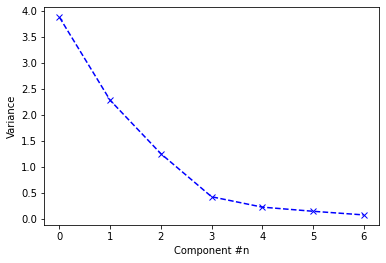

In [10]:
# PCA

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt  # 加载 matplotlib 用于数据的可视化
from sklearn.decomposition import PCA  # 加载 PCA 算法包

pca = PCA(n_components=X2_eco.shape[1]-1)  # 创建主成分分析对象，设定主成分数为样本特征数 - 1

reduced_x = pca.fit_transform(X2_eco)  # 基于已标准化数据创建主成分分析模型，对样本进行降维

covper = pca.explained_variance_  # 降维后的各主成分的方差值
covper = np.round(covper, 2)  # 调整精确度
print(covper)

# 绘制碎石图

plt.plot(covper, 'bx--')
plt.xlabel('Component #n')
plt.ylabel('Variance')
plt.show()

In [11]:
contribution = pca.explained_variance_ratio_  # 降维后的各主成分的方差值占总方差值的比例（贡献率）
contribution = np.round(contribution, 2)
pd.DataFrame(contribution)  # 输出贡献率

,0
0,0.47
1,0.28
2,0.15
3,0.05
4,0.03
5,0.02
6,0.01


In [12]:
pd.DataFrame(np.round(reduced_x, 3))   # 输出主成分

,0,1,2,3,4,5,6
0,0.841,2.294,0.551,0.030,0.753,-0.583,0.155
1,0.672,2.687,-1.178,-0.519,-0.114,-0.607,-0.310
2,1.384,-2.379,-1.347,-0.410,1.459,0.603,-0.047
3,-1.002,-0.388,-0.581,-0.094,0.055,0.082,0.196
4,-1.645,-0.728,-0.386,-0.310,0.042,0.624,-0.156
5,1.694,-0.983,-0.630,-1.574,0.185,-0.303,0.459
6,-0.388,0.440,-1.220,-0.402,-0.684,0.231,0.235
7,0.543,-0.339,-0.709,-1.053,-0.711,0.131,0.053
8,3.246,3.317,2.950,-1.557,0.039,0.393,-0.014
9,3.632,-1.281,0.394,0.810,-0.454,0.076,0.348


###  1.1.3 普惠金融数据

FI.csv

In [ ]:
import pandas as pd
import numpy as np

root_dir = '/Users/pengyuchao/python/foclass2021/data/'
X_FI = pd.read_csv(root_dir+'FI.csv')
X_FI.head()

In [ ]:
# 进行标准化

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # 创建数据标准化模型

scaler.fit(X_FI)  # 计算用于以后缩放的 mean 和 std

X2_FI = pd.DataFrame(scaler.transform(X_FI))  # transfrom 方法通过找中心和缩放等实现标准化

X2_FI.head()  # 查看标准化后的数据列

In [ ]:
# PCA

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt  # 加载 matplotlib 用于数据的可视化
from sklearn.decomposition import PCA  # 加载 PCA 算法包

pca = PCA(n_components=X2_FI.shape[1]-1)  # 创建主成分分析对象，设定主成分数为样本特征数 - 1

reduced_x = pca.fit_transform(X2_FI)  # 基于已标准化数据创建主成分分析模型，对样本进行降维

covper = pca.explained_variance_ratio_  # 降维后的各主成分的方差值
covper = np.round(covper, 2)  # 调整精确度
print(covper)

# 绘制碎石图

plt.plot(covper, 'bx--')
plt.xlabel('Component #n')
plt.ylabel('Variance')
plt.show()

In [ ]:
pd.DataFrame(np.round(reduced_x, 3))   # 输出主成分

 
## 1.2 因子分析

### 1.2.1 示例数据


我们用专门的模块factor_analyzer来处理因子分析

conda install -c desilinguist factor_analyzer


In [ ]:
# 导入数据

import pandas as pd
import numpy as np

root_dir = 'data/'
X = pd.read_csv(root_dir+'fa.csv')
X.head()

In [ ]:
# 进行标准化

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # 创建数据标准化模型

scaler.fit(X)  # 计算用于以后缩放的 mean 和 std

X2 = pd.DataFrame(scaler.transform(X))  # transfrom 方法通过找中心和缩放等实现标准化

X2.head()  # 查看标准化后的数据列

In [ ]:
# 因子分析
import matplotlib.pyplot as plt  # 加载matplotlib用于数据的可视化
from factor_analyzer import FactorAnalyzer  # 导入因子分析包

fa = FactorAnalyzer(n_factors=4, method='ml',
                    rotation='varimax')  # 创建因子分析对象，设定因字数为 4
fa.fit(X2)
ev, v = fa.get_eigenvalues()  # 输出因子相关矩阵和特征值
fa.get_eigenvalues()

In [ ]:
# 绘制碎石图
plt.scatter(range(1, X2.shape[1]+1), ev)
plt.plot(range(1, X2.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
pd.DataFrame(np.round(fa.loadings_, 2))  # 因子载荷
#pd.DataFrame(np.round(fa.transform(X2), 2))  # 将原始的数据都转换为 4 个新的因子

###  1.2.2 普惠金融数据

FI.csv

In [ ]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer

root_dir = 'data/'
X_FI = pd.read_csv(root_dir+'FI.csv')
X_FI.head()

In [ ]:
# 进行标准化

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # 创建数据标准化模型

scaler.fit(X_FI)  # 计算用于以后缩放的 mean 和 std

X2_FI = pd.DataFrame(scaler.transform(X_FI))  # transfrom 方法通过找中心和缩放等实现标准化

X2_FI.head()  # 查看标准化后的数据列

In [ ]:
# 因子分析
import matplotlib.pyplot as plt  # 加载 matplotlib 用于数据的可视化
from factor_analyzer import FactorAnalyzer  # 导入因子分析包

fa = FactorAnalyzer(n_factors=3, method='ml',
                    rotation='varimax')  # 创建因子分析对象，设定因字数为 3
fa.fit(X2_FI)
ev, v = fa.get_eigenvalues()  # 输出因子相关矩阵和特征值
fa.get_eigenvalues()

In [ ]:
# 绘制碎石图
plt.scatter(range(1, X2_FI.shape[1]+1), ev)
plt.plot(range(1, X2_FI.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
# 输出因子载荷矩阵
Loading = pd.DataFrame(np.round(fa.loadings_, 2).T)
Loading

In [ ]:
Loading.columns = X_FI.columns
Loading

In [ ]:
Loading[abs(Loading) < 0.1] = 0
Loading

In [ ]:
"""
如何输出和R语言中所绘制的那种对应关系图
python似乎没有现成的代码，但是我们努力的先把这个表求出来
事实上，R是先将特别低的因子载荷（绝对值小于0.1）变换为0
然后，对每个变量，选取载荷最大的因子与之匹配
最后，将对应的因子载荷仍然小于 0.3 的变量设置为无人对应的变量
"""

import numpy as np


Loading = pd.DataFrame(np.round(fa.loadings_, 2).T)  # 提取因子载荷矩阵并转置
Loading.columns = X_FI.columns

Loading[abs(Loading) < 0.1] = 0  # 将特别低的因子载荷（绝对值小于 0.1）变换为 0
Loading2 = abs(Loading)  # 求因子载荷的绝对值

# 对每个变量，选取载荷最大的因子与之匹配
Lmaxi = pd.DataFrame(Loading2.idxmax()).T
xx = []
for i in range(len(Lmaxi.T)):
    xx.append(Loading.iat[Lmaxi.iat[0, i], i])

Lm = pd.DataFrame(np.vstack((xx, Lmaxi)))
Lm.columns = X_FI.columns
Lm1 = Lm.T
Lm1.columns = ['载荷', '因子序号']
Lm1.因子序号[abs(Lm1.载荷) < 0.3] = np.nan
Lm1.sort_values('因子序号')

In [ ]:
# 输出降维结果
# 此处注意，可自己根据实际需求采用不同的降维方式，默认按照全部因子载荷加权平均
pd.DataFrame(np.round(fa.transform(X2_FI), 2))